In [50]:
import pandas as pd
import numpy as np
import collections
%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv("201604121056-Aguttes_auction_price.csv", warn_bad_lines=True, error_bad_lines=False)
print data.columns

data['Sale Date'] = pd.to_datetime(data['Sale Date'], format='%m/%d/%Y', errors='coerce')
data.index = data['Sale Date']
data = data.sort('Sale Date')

yearData = data[pd.notnull(data['Sale Date'])]
yearData['Year'] = pd.DatetimeIndex(yearData['Sale Date']).year

/Users/gzhao/Library/Python/2.7/lib/python/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index([u'Sale Name', u'Sale Date', u'Sale Location', u'Sale Number',
       u'Lot Number', u'Lot Title', u'Lot Description', u'High Estimate',
       u'Low Estimate', u'Price', u'Currency', u'Status', u'Maker',
       u'Image URL', u'Provenance', u'Literature', u'Notes', u'URL'],
      dtype='object')


/Users/gzhao/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/gzhao/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


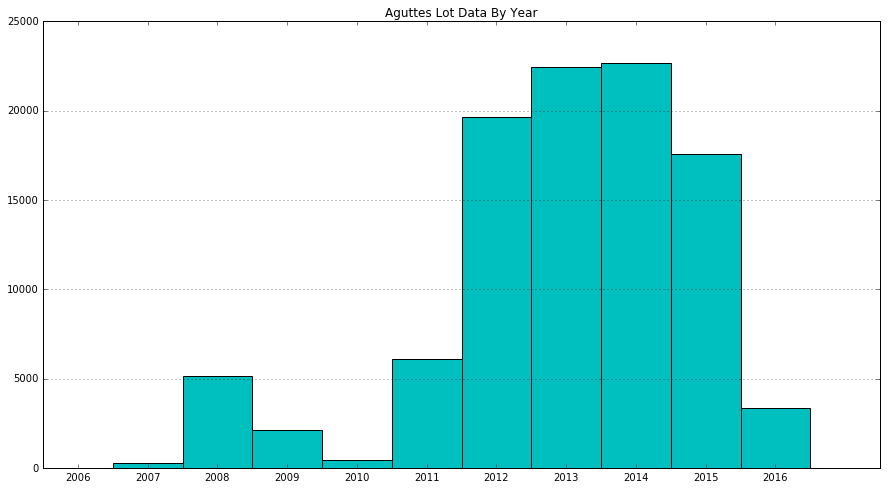

In [51]:
counter = collections.Counter(yearData['Year'])
values = counter.values()[1:]
values.append(counter.values()[0])
keys = counter.keys()[1:]
keys.append(counter.keys()[0])

plt.figure(figsize = (15, 8))
plt.bar(np.arange(len(counter.values())), values, 1.0, color = 'c')
plt.xticks(np.arange(len(counter.values())) + 0.5, keys)
plt.gca().yaxis.grid(True)
plt.title('Aguttes Lot Data By Year')

In [3]:
df = {}
numbers = []

for x in data.columns:
    df[x] = data[pd.notnull(data[x])]
    numbers.append(len(df[x])/float(len(data)))

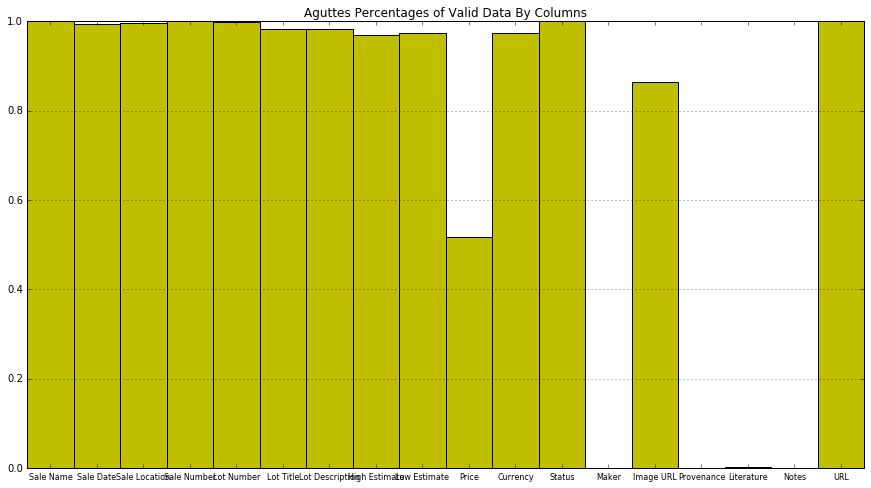

In [4]:
plt.figure(figsize = (15, 8))
plt.bar(np.arange(len(numbers)), numbers, 1.0, color = 'y')
plt.xticks(np.arange(len(numbers)) + 0.5, data.columns, fontsize = 8)
plt.gca().yaxis.grid(True)
plt.title('Aguttes Percentages of Valid Data By Columns')

In [77]:
import numpy as np

times = np.load('Aguttes_times.npy')
numbers = np.load('Aguttes_numbers.npy')

In [78]:
years = []

for x in times:
    try:
        years.append(int(x.split(' ')[3]))
    except:
        years.append(int(x.split(' ')[4]))

In [85]:
import re
nums = []

for x in numbers:
    nums.append(int(re.sub("[^0-9]", "", x.split(' ')[-3])))

In [86]:
import pandas as pd

yearData = pd.DataFrame()
yearData['Year'] = years
yearData['Number'] = nums

In [87]:
num = []
for x in range(2006, 2017):
    sample = yearData[yearData['Year'] == x]
    num.append(sum(sample['Number']))

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


[-0.5, 11, 0, 30000]

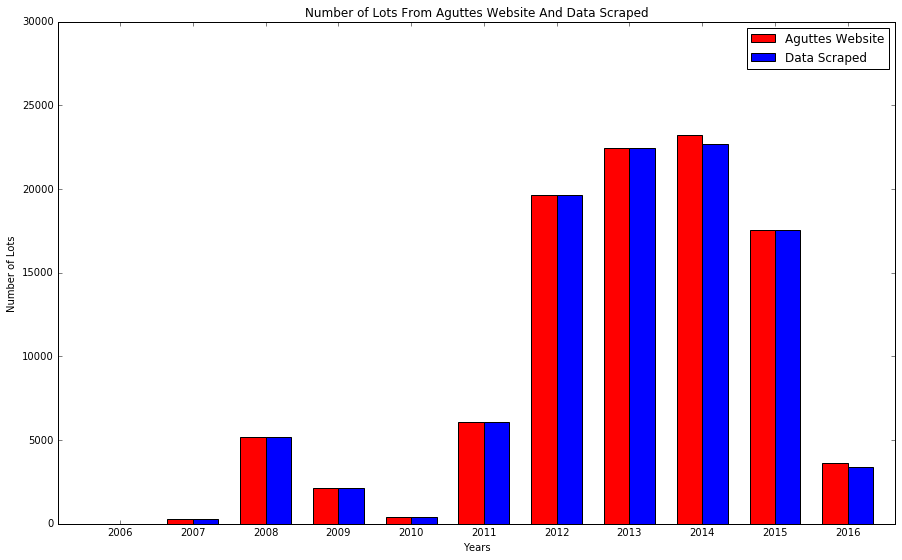

In [88]:
%pylab inline

n_groups = len(num)

means_men = tuple(num)
means_women = tuple(values)

fig, ax = plt.subplots(figsize=(15,9))
index = np.arange(n_groups)
bar_width = 0.35

opacity = 1

rects1 = plt.bar(index, means_men, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Aguttes Website')

rects2 = plt.bar(index + bar_width, means_women, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Data Scraped')

plt.xlabel('Years')
plt.ylabel('Number of Lots')
plt.title('Number of Lots From Aguttes Website And Data Scraped')
plt.xticks(index + bar_width, tuple([x for x in range(2006, 2017)]))
plt.legend(loc = 'upper right')
plt.axis([-0.5, 11, 0, 30000])